<a href="https://colab.research.google.com/github/Siri800/Applications-of-Data-Mining/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
advertising = pd.DataFrame(pd.read_csv("/content/SLR_Salary_dataset.csv"))
advertising.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
advertising.shape

(30, 3)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
advertising.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

,0
Unnamed: 0,0.0
YearsExperience,0.0
Salary,0.0


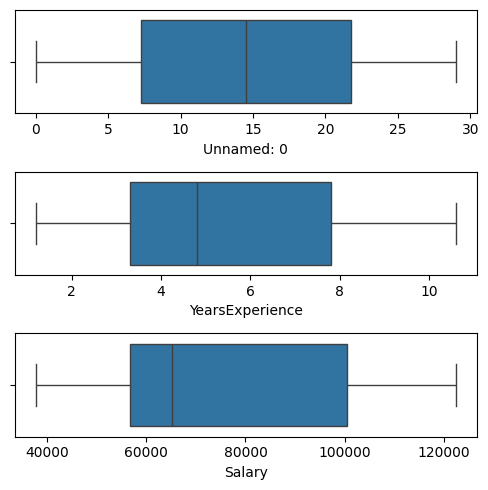

In [18]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x=advertising['Unnamed: 0'], ax = axs[0])
plt2 = sns.boxplot(x=advertising['YearsExperience'], ax = axs[1])
plt3 = sns.boxplot(x=advertising['Salary'], ax = axs[2])
plt.tight_layout()

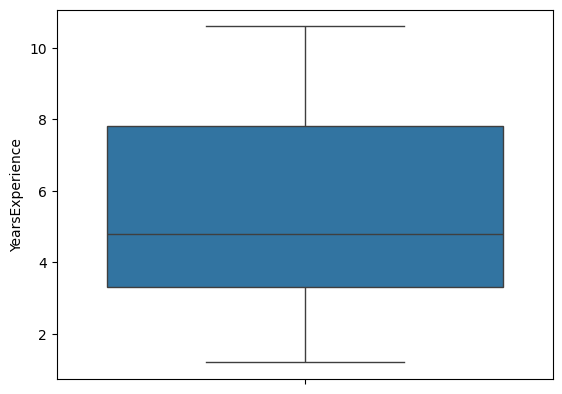

In [20]:
sns.boxplot(advertising['YearsExperience'])
plt.show()

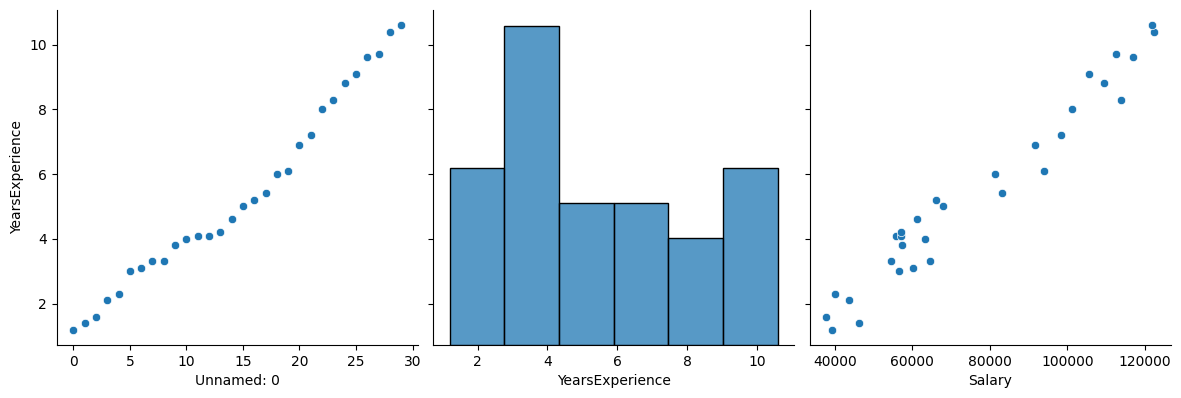

In [21]:
sns.pairplot(advertising, x_vars=['Unnamed: 0', 'YearsExperience', 'Salary'], y_vars='YearsExperience', height=4, aspect=1, kind='scatter')
plt.show()

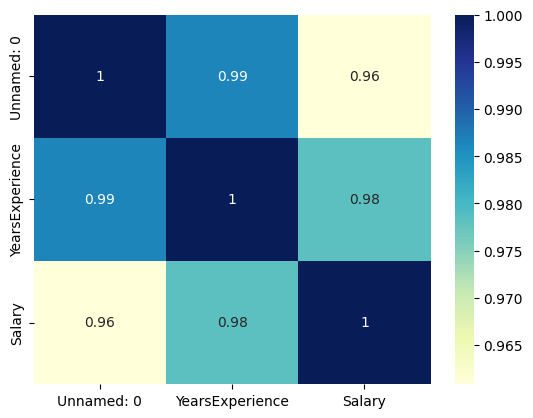

In [22]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [23]:
X = advertising['Unnamed: 0']
y = advertising['YearsExperience']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
X_train.head()


,Unnamed: 0
17,17
22,22
11,11
4,4
29,29


In [26]:
y_train.head()

,YearsExperience
17,5.4
22,8.0
11,4.1
4,2.3
29,10.6


In [27]:
import statsmodels.api as sm

In [28]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [29]:
lr.params

,0
const,0.880316
Unnamed: 0,0.306033


In [30]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        YearsExperience   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     715.0
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.54e-16
Time:                        04:18:59   Log-Likelihood:                -11.271
No. Observations:                  21   AIC:                             26.54
Df Residuals:                      19   BIC:                             28.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8803      0.182      4.848      0.0

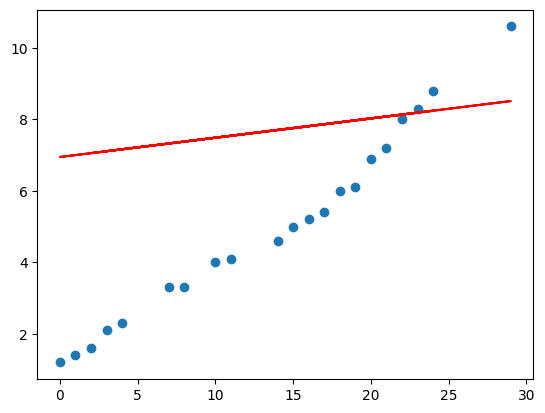

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()


In [32]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-33-723b49e70e34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


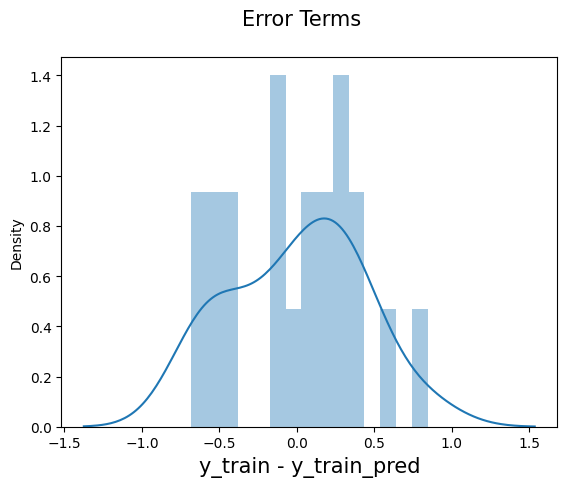

In [33]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

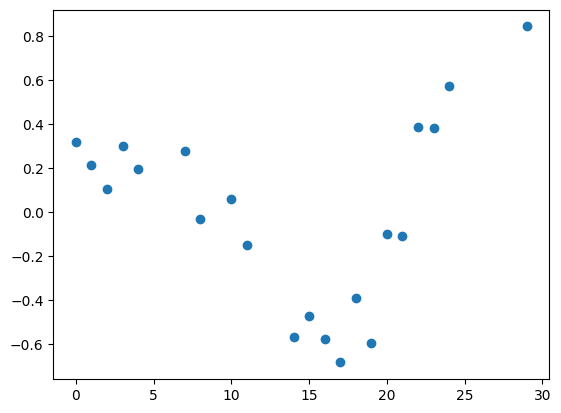

In [34]:
plt.scatter(X_train,res)
plt.show()

In [35]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [36]:
y_pred.head()

,0
9,3.634613
26,8.837173
28,9.449239
13,4.858745
5,2.410481


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6037210963979407

In [39]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9608180547046896

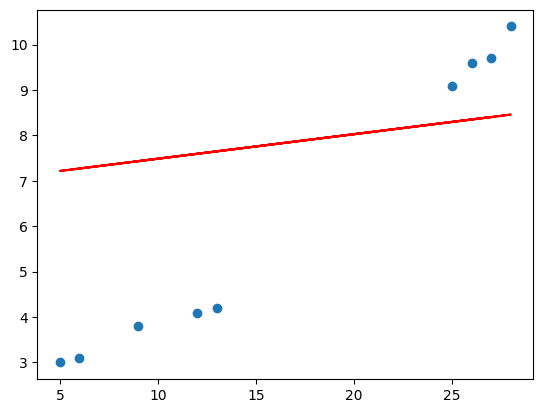

In [40]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()